In [1]:
# Healthcare EDA Project
#This project explores hospital admission data using Python, Pandas, and visualization tools. The goal is to discover trends, identify patient demographics, and understand health conditions among admitted patients.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("HDHI Admission Data.csv")

# Rename useful columns
df.rename(columns={
    'MRD No.': 'patientid',
    'GENDER': 'gender',
    'TYPE OF ADMISSION-EMERGENCY/OPD': 'admission_type'
}, inplace=True)
print(df)

         SNO patientid       D.O.A       D.O.D  AGE gender RURAL  \
0          1    234735    4/1/2017    4/3/2017   81      M     R   
1          2    234696    4/1/2017    4/5/2017   65      M     R   
2          3    234882    4/1/2017    4/3/2017   53      M     U   
3          4    234635    4/1/2017    4/8/2017   67      F     U   
4          5    234486    4/1/2017   4/23/2017   60      F     U   
...      ...       ...         ...         ...  ...    ...   ...   
15752  15753    699585  31/03/2019  04/04/2019   86      F     U   
15753  15754    699500   3/31/2019    4/1/2019   50      M     R   
15754  15755    700415  31/03/2019  09/04/2019   82      M     U   
15755  15756    699524  31/03/2019  03/04/2019   59      F     U   
15756  15757    699524  31/03/2019  03/04/2019   59      F     U   

      admission_type month year  DURATION OF STAY  ...  CONGENITAL UTI  \
0                  E     Apr-17                 3  ...           0   0   
1                  E     Apr-17    

In [3]:
### Q1: Total number of admissions

We calculated the total number of hospital admissions using the number of rows in the dataset.

total_admissions = len(df)
print("Total number of admissions:", total_admissions)


SyntaxError: invalid syntax (1951797415.py, line 3)

In [4]:
### Q1: Total number of admissions

## We calculated the total number of hospital admissions using the number of rows in the dataset.

total_admissions = len(df)
print("Total number of admissions:", total_admissions)


Total number of admissions: 15757


C:\Users\hp\AppData\Local\Temp\ipykernel_15308\195998379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Set2')


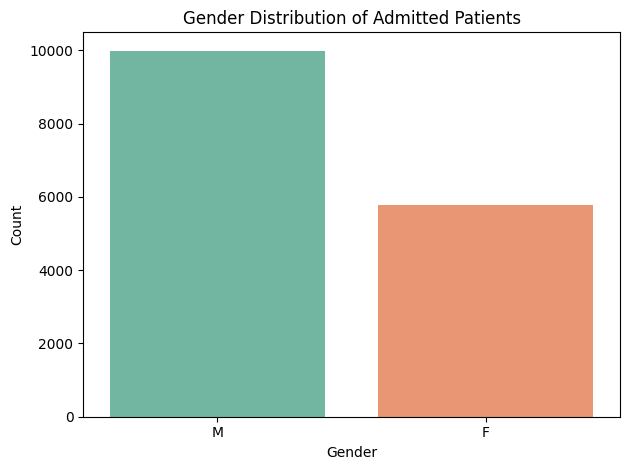

In [5]:
### Q2: Gender distribution

## This plot shows how many male and female patients were admitted.

sns.countplot(data=df, x='gender', palette='Set2')
plt.title("Gender Distribution of Admitted Patients")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_15308\1842672363.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='age_group', order=age_labels, palette='coolwarm')


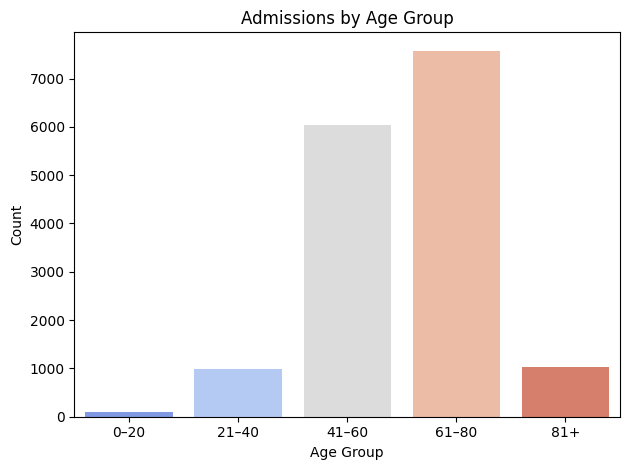

In [6]:
### Q3: Most common age group

## Most admissions occur in the 41–60 and 61–80 age ranges.

age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0–20', '21–40', '41–60', '61–80', '81+']
df['age_group'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels)

sns.countplot(data=df, x='age_group', order=age_labels, palette='coolwarm')
plt.title("Admissions by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_15308\3376799720.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='admission_type', palette='pastel')


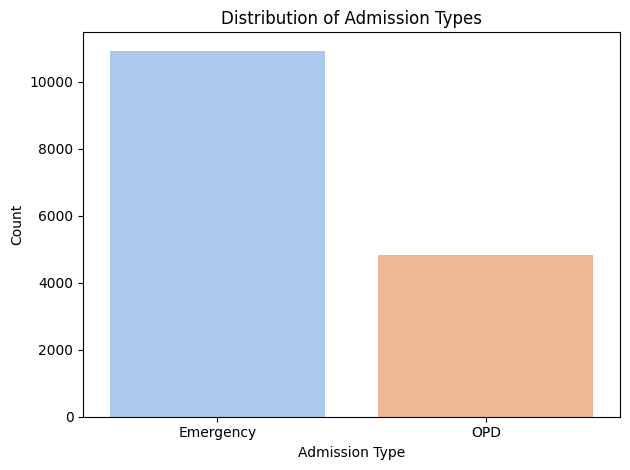

In [7]:
### Q4: Most common admission types

## Emergency admissions are the most common, followed by OPD and Referred cases.
df['admission_type'] = df['admission_type'].replace({'E': 'Emergency', 'O': 'OPD', 'R': 'Referred'})

sns.countplot(data=df, x='admission_type', palette='pastel')
plt.title("Distribution of Admission Types")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


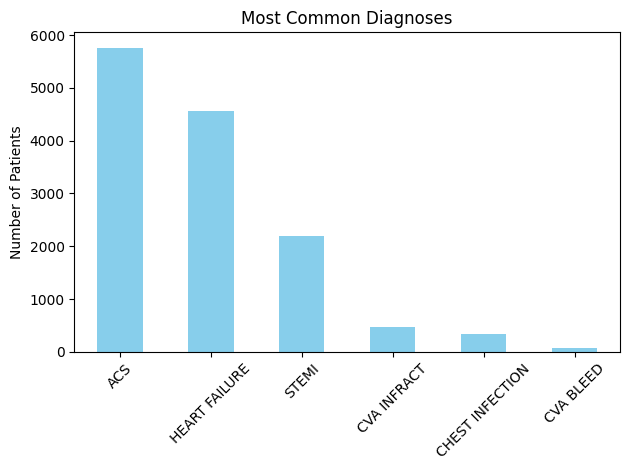

In [8]:
### Q5: Most common diagnoses

## Heart Failure and STEMI were the most common diagnoses among patients.

diagnosis_cols = ['HEART FAILURE', 'STEMI', 'ACS', 'CVA INFRACT', 'CVA BLEED', 'CHEST INFECTION']

for col in diagnosis_cols:
    df[col] = df[col].apply(lambda x: 1 if str(x).strip().lower() in ['1', 'yes', 'present'] else 0)

diagnosis_counts = df[diagnosis_cols].sum().sort_values(ascending=False)

diagnosis_counts.plot(kind='bar', color='skyblue')
plt.title("Most Common Diagnoses")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_15308\2240264603.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='assumed_room_type', palette='Set2')


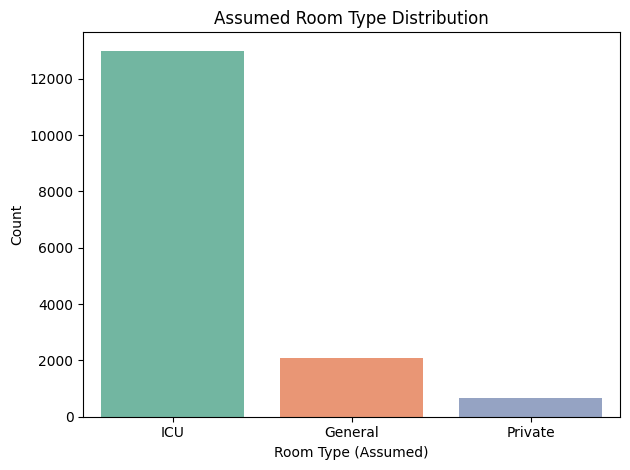

In [9]:
### Q6: Room type (assumed)

## Room types were assumed based on ICU stay and duration of stay. ICU, General, and Private rooms were estimated.

def assign_room_type(row):
    if row['duration of intensive unit stay'] > 0:
        return 'ICU'
    elif row['DURATION OF STAY'] <= 4:
        return 'General'
    else:
        return 'Private'

df['assumed_room_type'] = df.apply(assign_room_type, axis=1)

sns.countplot(data=df, x='assumed_room_type', palette='Set2')
plt.title("Assumed Room Type Distribution")
plt.xlabel("Room Type (Assumed)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


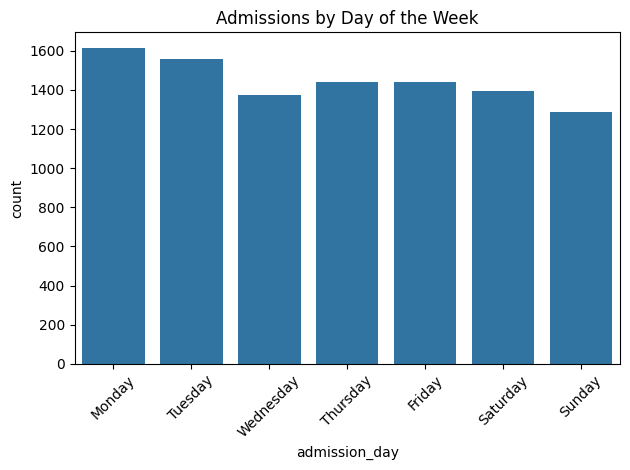

In [10]:
### Q7: Most common day of admission

## Most patients were admitted on Monday and Tuesday.

df['D.O.A'] = pd.to_datetime(df['D.O.A'], errors='coerce')
df['admission_day'] = df['D.O.A'].dt.day_name()

sns.countplot(data=df, x='admission_day', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.title("Admissions by Day of the Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


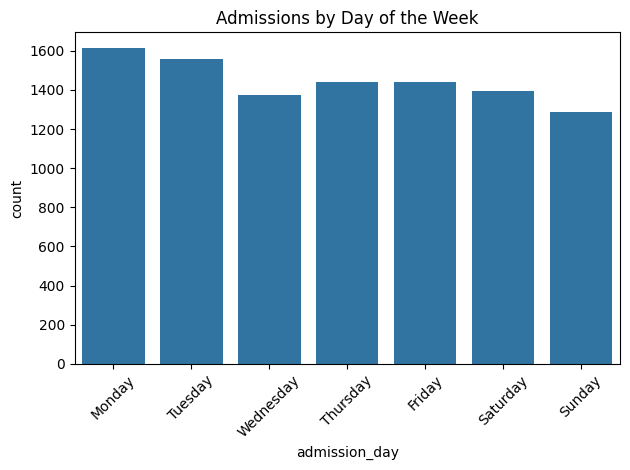

In [11]:
### Q7: Most common day of admission

## Most patients were admitted on Monday and Tuesday.

df['D.O.A'] = pd.to_datetime(df['D.O.A'], errors='coerce')
df['admission_day'] = df['D.O.A'].dt.day_name()

sns.countplot(data=df, x='admission_day', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.title("Admissions by Day of the Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


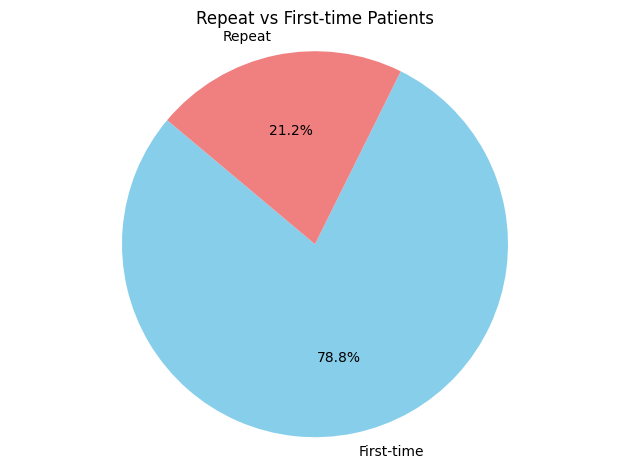

In [12]:
### Q8: Repeat patients

## Based on duplicate MRD numbers, we estimated how many patients visited more than once within the dataset period.

visit_counts = df['patientid'].value_counts()
repeat_patients = visit_counts[visit_counts > 1]
repeat_count = len(repeat_patients)
first_time_count = len(visit_counts) - repeat_count

# Pie chart
plt.pie(
    [first_time_count, repeat_count],
    labels=['First-time', 'Repeat'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue', 'lightcoral']
)
plt.title("Repeat vs First-time Patients")
plt.axis('equal')
plt.tight_layout()
plt.show()


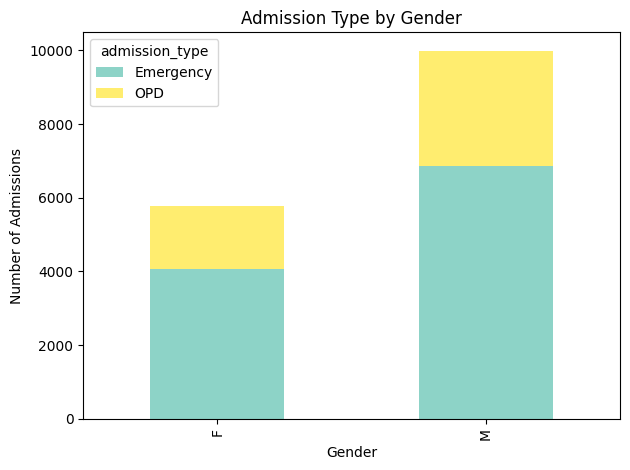

In [13]:
### Q9: Admission types across gender

## Admission types were slightly different across genders, with males showing a higher share of emergency admissions.

admission_gender_ct = pd.crosstab(df['gender'], df['admission_type'])

admission_gender_ct.plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Admission Type by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Admissions")
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_15308\3087076294.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Set2')


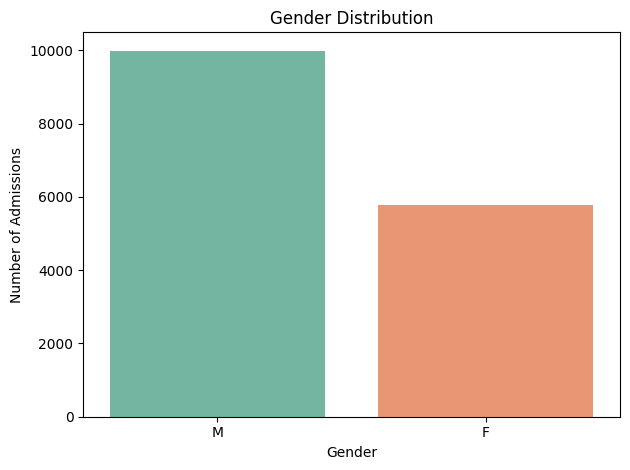

In [14]:
### Q10: 3 Key Visualizations

## We created the following visualizations:

## 1. Gender Distribution
## 2. Admission Types
## 3. Most Common Diagnoses

## These visual patterns help summarize key trends in the dataset.

sns.countplot(data=df, x='gender', palette='Set2')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Admissions")
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_15308\2074694802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='admission_type', palette='pastel')


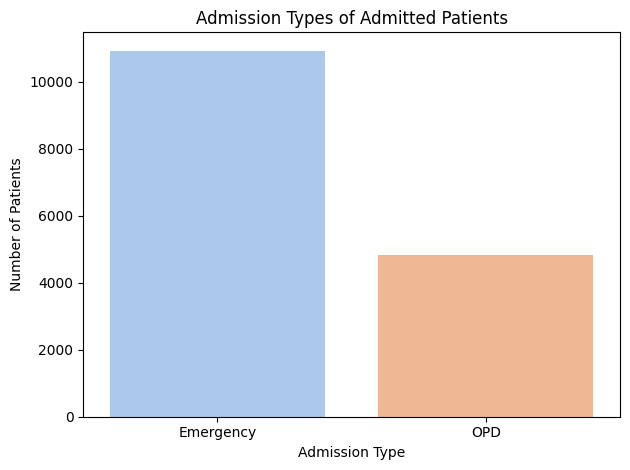

In [15]:
## 2. Admission Types

sns.countplot(data=df, x='admission_type', palette='pastel')
plt.title("Admission Types of Admitted Patients")
plt.xlabel("Admission Type")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()


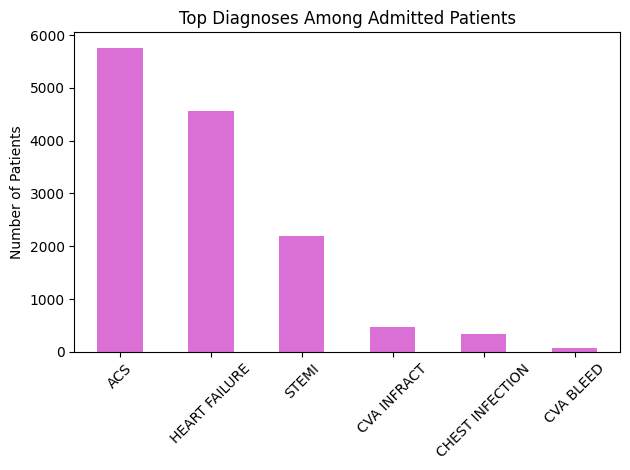

In [16]:
## 3. Top Diagnoses

diagnosis_cols = ['HEART FAILURE', 'STEMI', 'ACS', 'CVA INFRACT', 'CVA BLEED', 'CHEST INFECTION']
for col in diagnosis_cols:
    df[col] = df[col].apply(lambda x: 1 if str(x).strip().lower() in ['1', 'yes', 'present'] else 0)

diagnosis_counts = df[diagnosis_cols].sum().sort_values(ascending=False)

diagnosis_counts.plot(kind='bar', color='orchid')
plt.title("Top Diagnoses Among Admitted Patients")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
